In [1]:
from sklearn.metrics import log_loss
log_loss(["REAL", "FAKE", "FAKE", "REAL"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML

In [3]:
!ls -GFlash /Users/cybergangster/Desktop/df

total 75984
    0 drwxr-xr-x  9 cybergangster  staff   288B May  7 18:02 ./
    0 drwx------@ 8 cybergangster  staff   256B May  8 17:34 ../
   16 -rw-r--r--@ 1 cybergangster  staff   6.0K May  7 17:58 .DS_Store
40936 -rw-r--r--  1 cybergangster  staff    20M May  7 18:02 Untitled1 - Jupyter Notebook.webarchive
  424 -rw-r--r--@ 1 cybergangster  staff   210K May  7 17:37 test.json
 7352 -rw-r--r--@ 1 cybergangster  staff   3.6M May  7 13:11 test.mp4
11280 -rw-r--r--@ 1 cybergangster  staff   5.5M May  7 15:31 test2 복사본.mp4
11280 -rw-r--r--@ 1 cybergangster  staff   5.5M May  7 15:31 test2.mp4
 4696 -rw-r--r--@ 1 cybergangster  staff   2.3M May  7 17:42 test3.mp4


In [4]:
!du -sh /Users/cybergangster/Desktop/df

 37M	/Users/cybergangster/Desktop/df


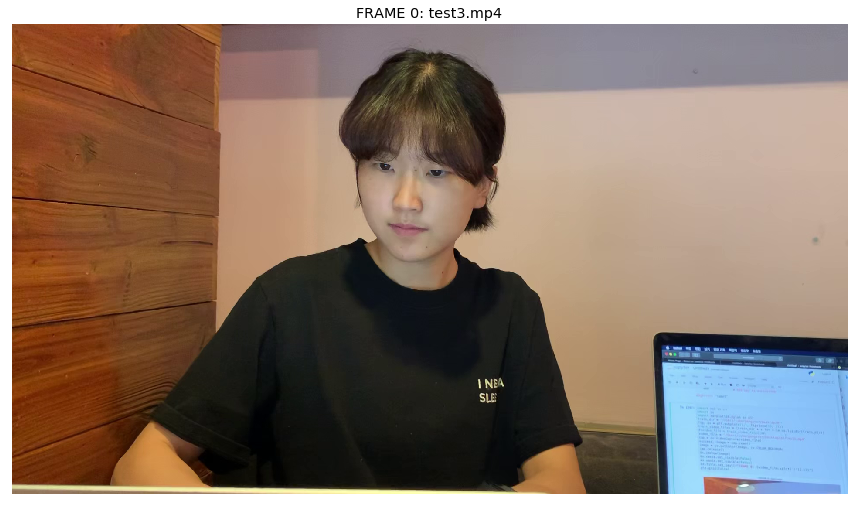

In [6]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = '/Users/cybergangster/Desktop/df'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
#\video_file = train_video_files[30]
video_file = '/Users/cybergangster/Desktop/df/test3.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

[(291, 1034, 514, 811)]
I found 1 face(s) in this photograph.
A face is located at pixel location Top: 291, Left: 811, Bottom: 514, Right: 1034


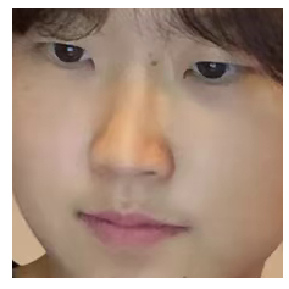

In [7]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print(face_locations)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

In [8]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(799, 327), (799, 361), (802, 396), (808, 429), (820, 461), (838, 489), (859, 514), (881, 536), (908, 545), (940, 544), (973, 529), (1003, 509), (1029, 484), (1048, 454), (1060, 420), (1065, 383), (1068, 347)]
The left_eyebrow in this face has the following points: [(813, 306), (829, 293), (851, 290), (873, 294), (892, 304)]
The right_eyebrow in this face has the following points: [(934, 308), (958, 303), (984, 304), (1009, 313), (1028, 330)]
The nose_bridge in this face has the following points: [(912, 338), (909, 364), (906, 389), (903, 416)]
The nose_tip in this face has the following points: [(881, 426), (892, 432), (904, 436), (918, 434), (931, 432)]
The left_eye in this face has the following points: [(837, 327), (850, 322), (865, 326), (877, 338), (862, 337), (847, 335)]
The right_eye in this face has the following points: [(954, 347), (967, 339), (983, 340), (999, 346), (983, 351), (967, 350)]
The top_lip in this face has the fol

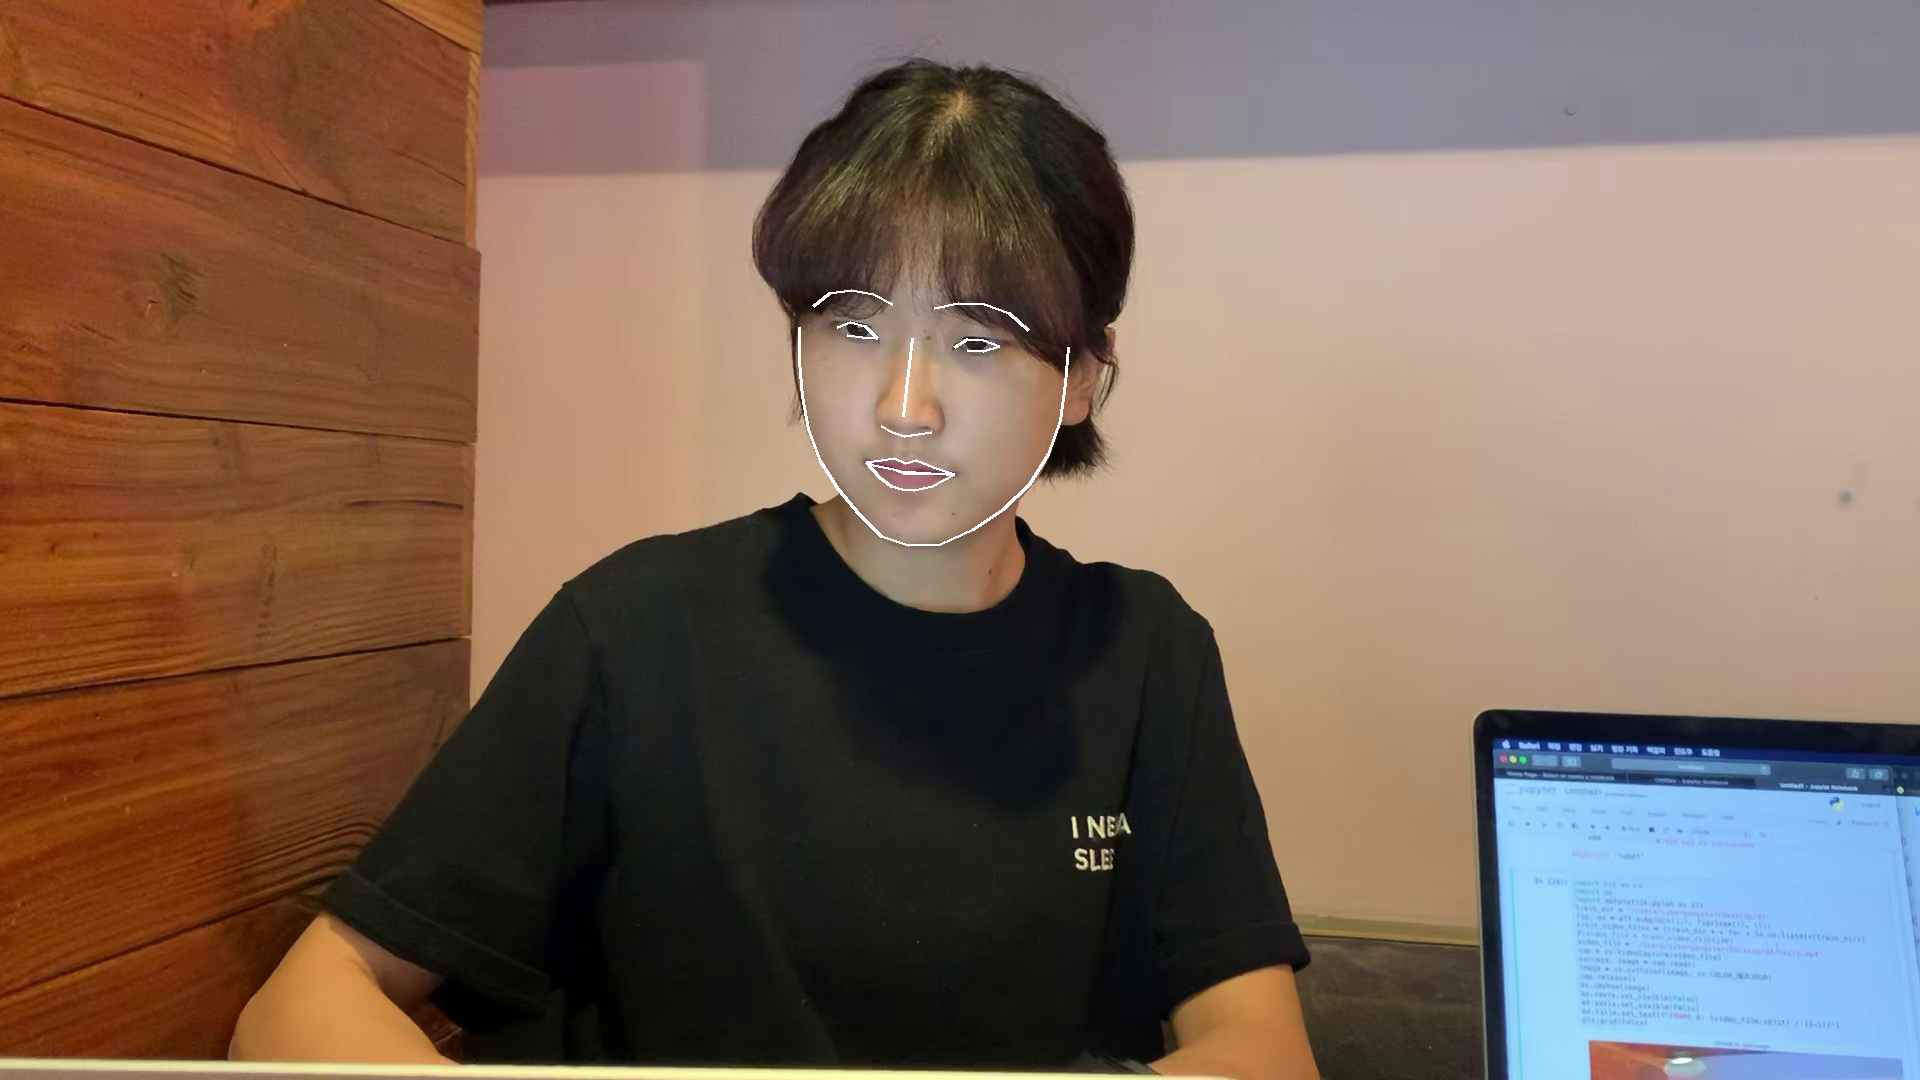

In [9]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_facial_features_in_picture.py
# face_landmarks_list
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

In [10]:
video_file = '/Users/cybergangster/Desktop/df/test3.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  163


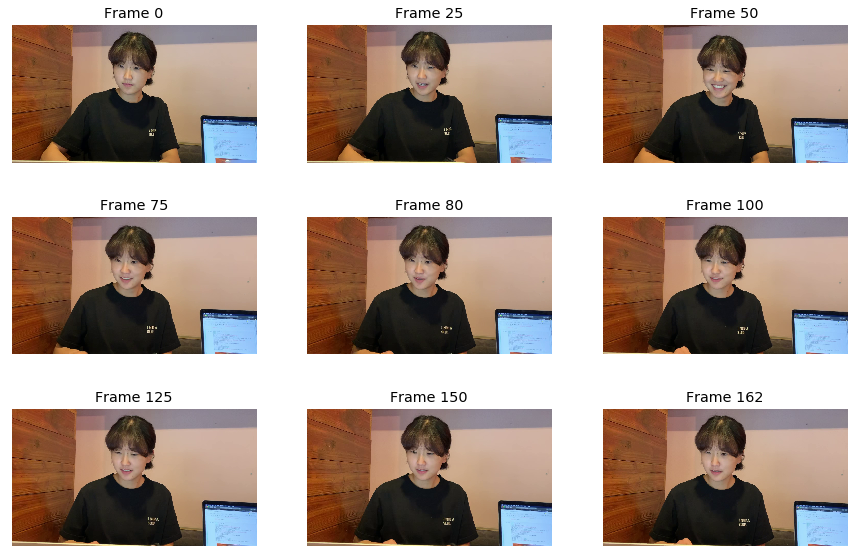

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0,25,50,75,80,100,125,150,162]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

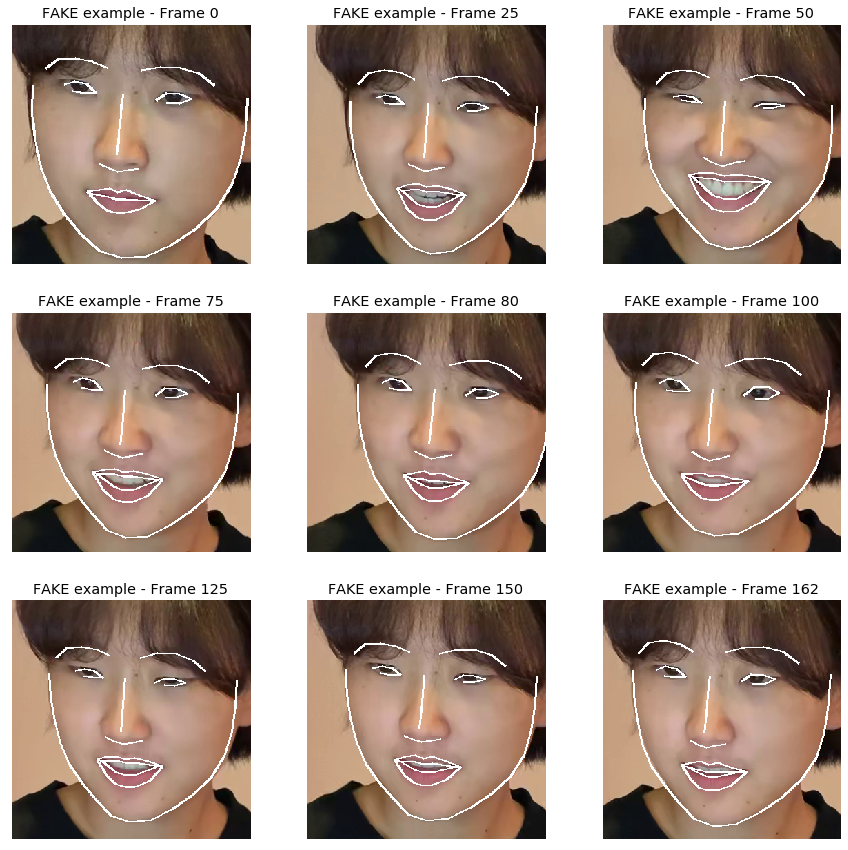

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0,25,50,75,80,100,125,150,162]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

The number of frames saved:  163


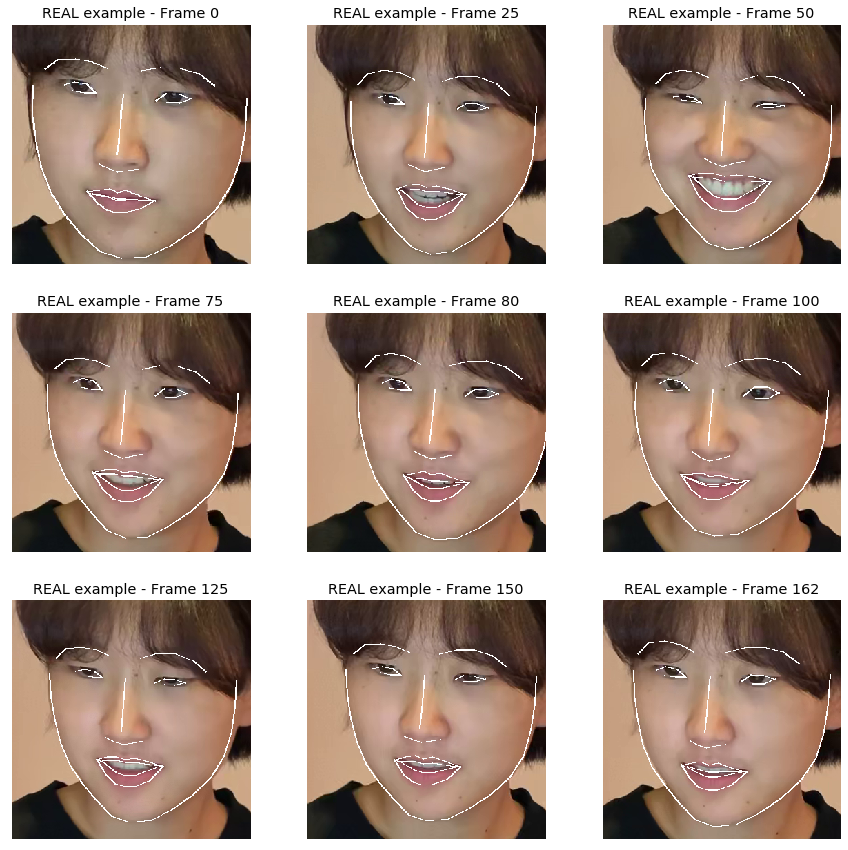

In [13]:
fn = 'test3.mp4'
video_file = f'/Users/cybergangster/Desktop/df/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0,25,50,75,80,100,125,150,162]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()